# Multiple Linear Regression

# Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
### Objective
 Essesntialy The company wants to know - 
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
#imporitng the required libraries
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Reading and Understanding the Data


In [2]:
#Reading the CSV file using panda
df = pd.read_csv('day.csv')

In [3]:
#chekcing head of data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape of dataframe
df.shape

(730, 16)

In [5]:
#describe the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#checking the info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Step 2: Cleaning the data

In [7]:

#checking if any null values in columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# dropping the duplicates

df.drop_duplicates(inplace=True)

In [9]:
#again checking the shape
df.shape

(730, 16)

In [10]:
#as the count is intact mean no duplicates and null found in the dataframe
#let's drop the unwanted columns from the dataframe
#instant : As this is just an index, we can surely drop this column
#dteday : As we have month and year as separate columns, we can ignore this column
#casual and registered : looks like cnt = casual + registered, as we already have another column to signify these count, we can ignore these columns.
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
#let's check the shape again
df.shape

(730, 12)

In [12]:
#let's check the head of dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#for better readbility let's encode the columns with given values
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [14]:
df.mnth = df.mnth.map({1:'mnth_jan',2:'mnth_feb',3:'mnth_mar',4:'mnth_apr',5:'mnth_may',6:'mnth_june',7:'mnth_july',8:'mnth_aug',9:'mnth_sep',10:'mnth_oct',11:'mnth_nov',12:'mnth_dec'})


In [15]:
df.weekday = df.weekday.map({0:'day_sun',1:'day_mon',2:'day_tues',3:'day_wed',4:'day_thu',5:'day_fri',6:'day_sat'})


In [16]:
df.weathersit = df.weathersit.map({1:'good',2:'moderate',3:'bad',4:'severe'})

In [17]:
#let's check the head now to check of column data is encoded
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,mnth_jan,0,day_sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,mnth_jan,0,day_sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,mnth_jan,0,day_mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,mnth_jan,0,day_tues,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,mnth_jan,0,day_wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Step 3: Visualising the Data - EDA

### Let's now spend some time doing what is arguably the most important step - Visualising the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable.
We'll visualise our data using matplotlib and seaborn.

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 1500x3000 with 0 Axes>

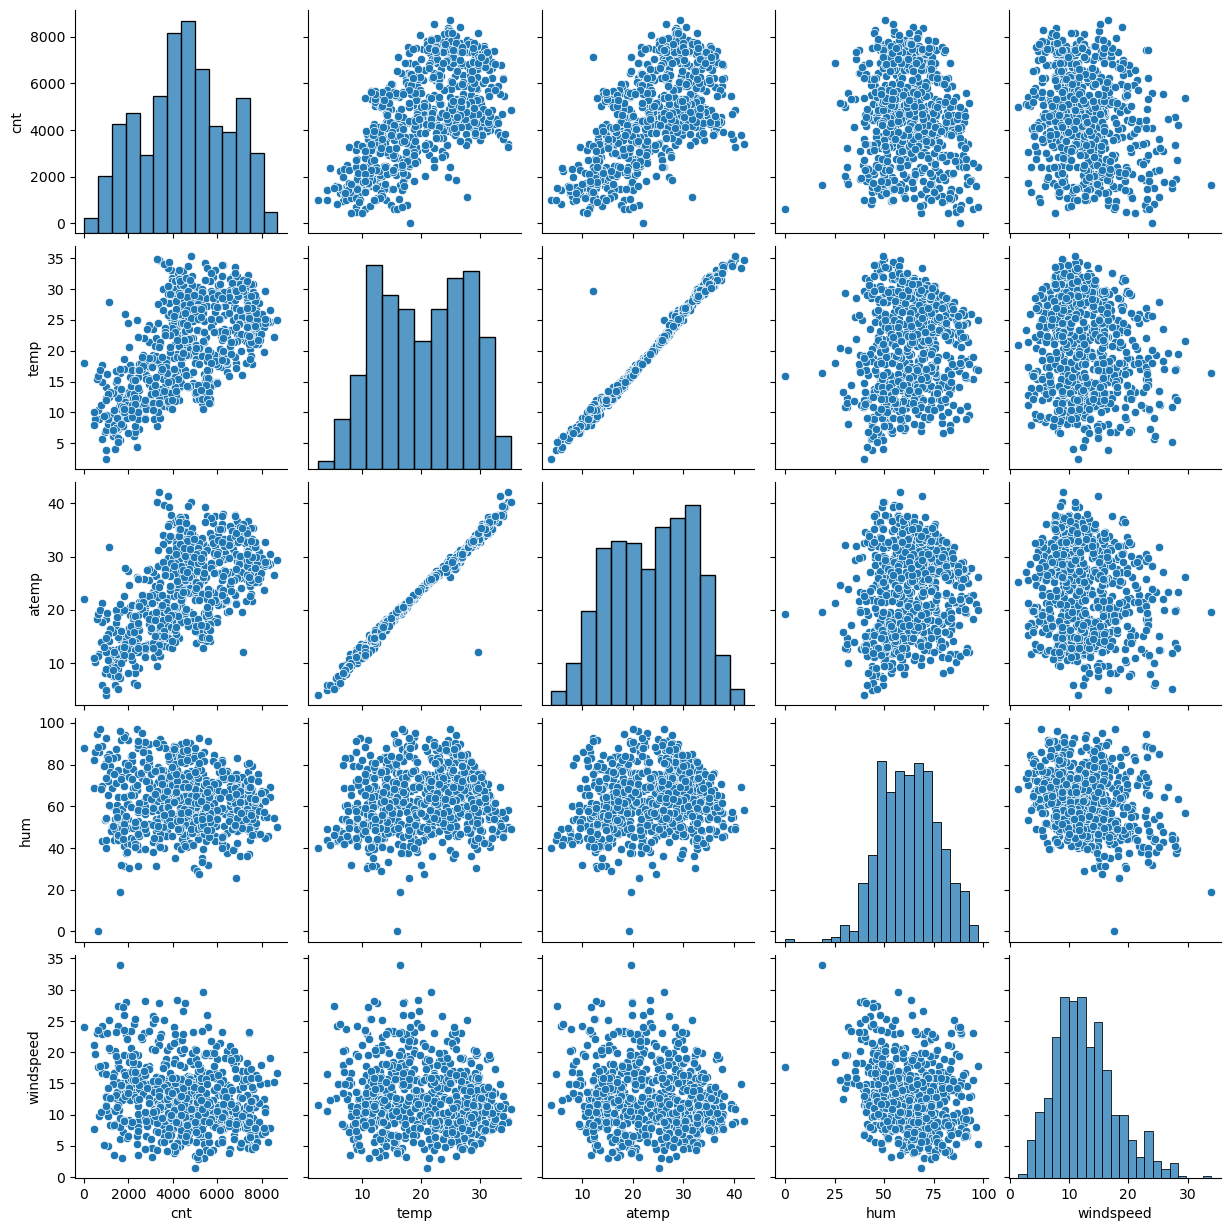

In [69]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()
#Conclusion : Inference:
## - Looks like the temp and atemp has the highest linear corelation with the target variable cnt
## - temp and atemp are highly co-related with each other

### Conclusion : Inference -
#### - Looks like the temp and atemp has the highest linear corelation with the target variable cnt
#### - temp and atemp are highly co-related with each other
#### - Demand for bikes is positively correlated to temp.
#### - Hum is values are more scattered around , Although we can see cnt decreasing with increase in humidity.We can see that cnt is linearly increasing with temp indicating linear relation.
#### - Windspeed is values are more scattered around.Although we can see cnt decreasing with increase in windspeed.

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

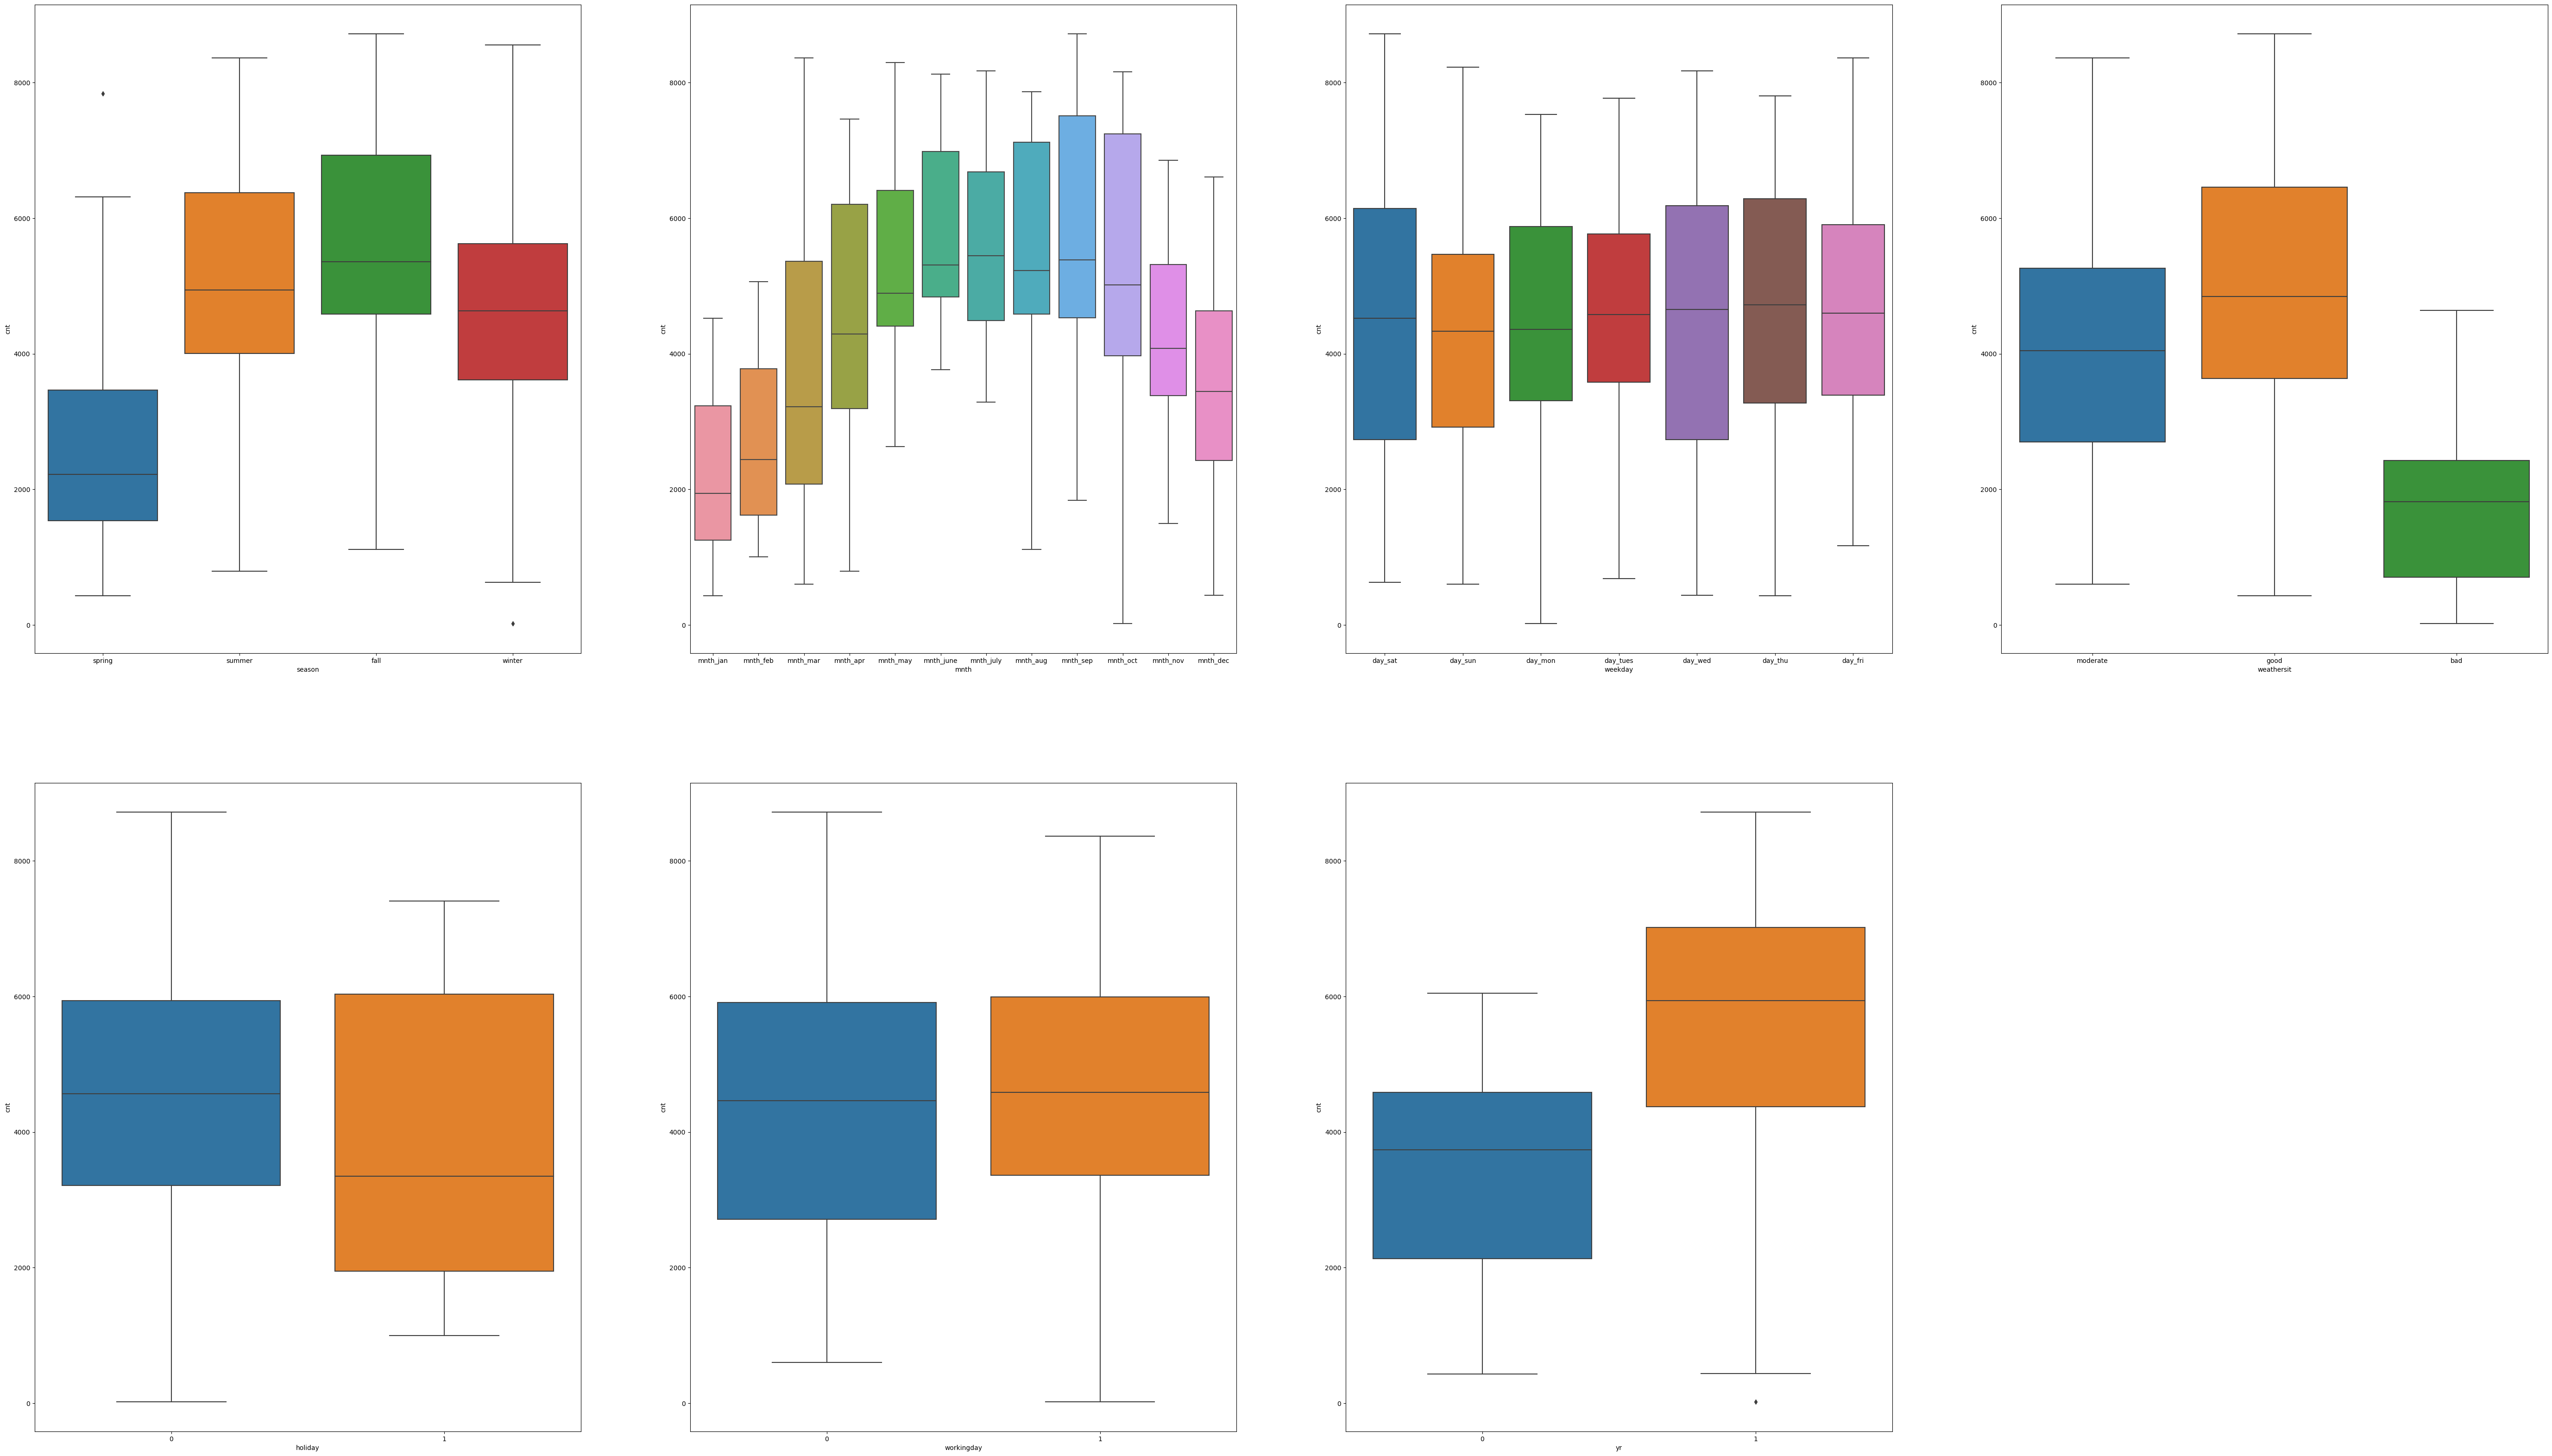

In [20]:
plt.figure(figsize=(70, 40))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

### Inference:
Here many insights can be drawn from the plots
1. Season: fall has highest demand for rental bikes
2. I see that demand in 2019 is significantly grown from 2018
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing.
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand

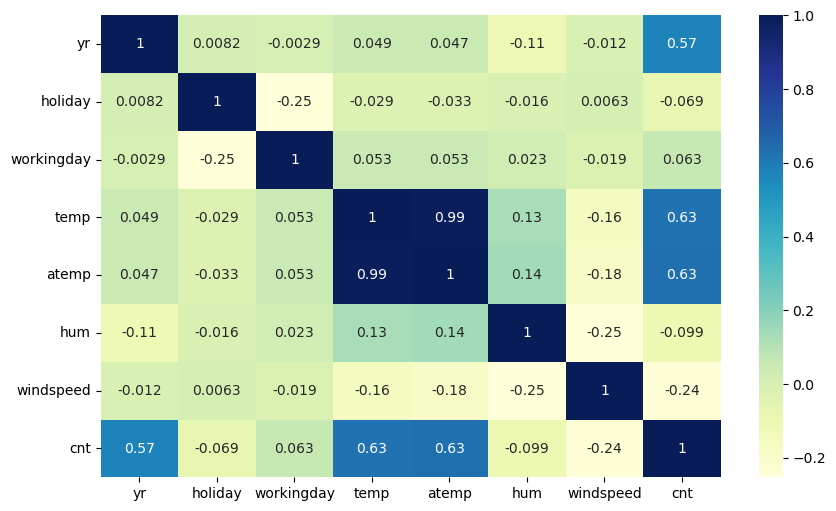

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()
#Conclusion: Inference:
#Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
#Temp and Atemp also have high correlation with cnt variable.

### Conclusion: Inference:
###  - Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
###  - Temp and Atemp also have high correlation with cnt variable.

# Step 4: Data Preparation

## Dummy Variables

In [22]:
# Dummy variable creation for catagorical coulmns which are highly correlated with cnt i.e. season, weekday, mnth and weathersit variables.
# Let's drop the first column from status df using 'drop_first = True' but not for weathersit to get data for extreme weather.

season_df = pd.get_dummies(df['season'], drop_first = True)
weekday_df = pd.get_dummies(df['weekday'], drop_first = True)
mnth_df = pd.get_dummies(df['mnth'], drop_first = True)
weathersit_df = pd.get_dummies(df['weathersit'])

In [23]:
# Add the results to the original df dataframe now
df = pd.concat([df, season_df,weekday_df,mnth_df,weathersit_df], axis = 1)

In [24]:
# Now let's see the head of our dataframe.

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
0,spring,0,mnth_jan,0,day_sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,spring,0,mnth_jan,0,day_sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,1
2,spring,0,mnth_jan,0,day_mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,mnth_jan,0,day_tues,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,mnth_jan,0,day_wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [25]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tues', 'day_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'bad', 'good', 'moderate'],
      dtype='object')

In [26]:
# Drop 'season,weekday,mnth,weathersit' as we have created the dummies for it

df.drop(['season'], axis = 1, inplace = True)
df.drop(['weekday'], axis = 1, inplace = True)
df.drop(['mnth'], axis = 1, inplace = True)
df.drop(['weathersit'], axis = 1, inplace = True)


In [27]:
#let's check the head now
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df.shape

(730, 31)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  day_mon     730 non-null    uint8  
 12  day_sat     730 non-null    uint8  
 13  day_sun     730 non-null    uint8  
 14  day_thu     730 non-null    uint8  
 15  day_tues    730 non-null    uint8  
 16  day_wed     730 non-null    uint8  
 17  mnth_aug    730 non-null    uint8  
 18  mnth_dec    730 non-null    uint8  
 19  mnth_feb    730 non-null    u

# Step 5: Splitting the Data into Training and Testing Sets

In [30]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
#checking the shape for training and test dataframe
df_train.shape

(510, 31)

In [32]:
df_test.shape

(219, 31)

### Rescaling the Features

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tues', 'day_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sep', 'bad', 'good', 'moderate'],
      dtype='object')

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [36]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


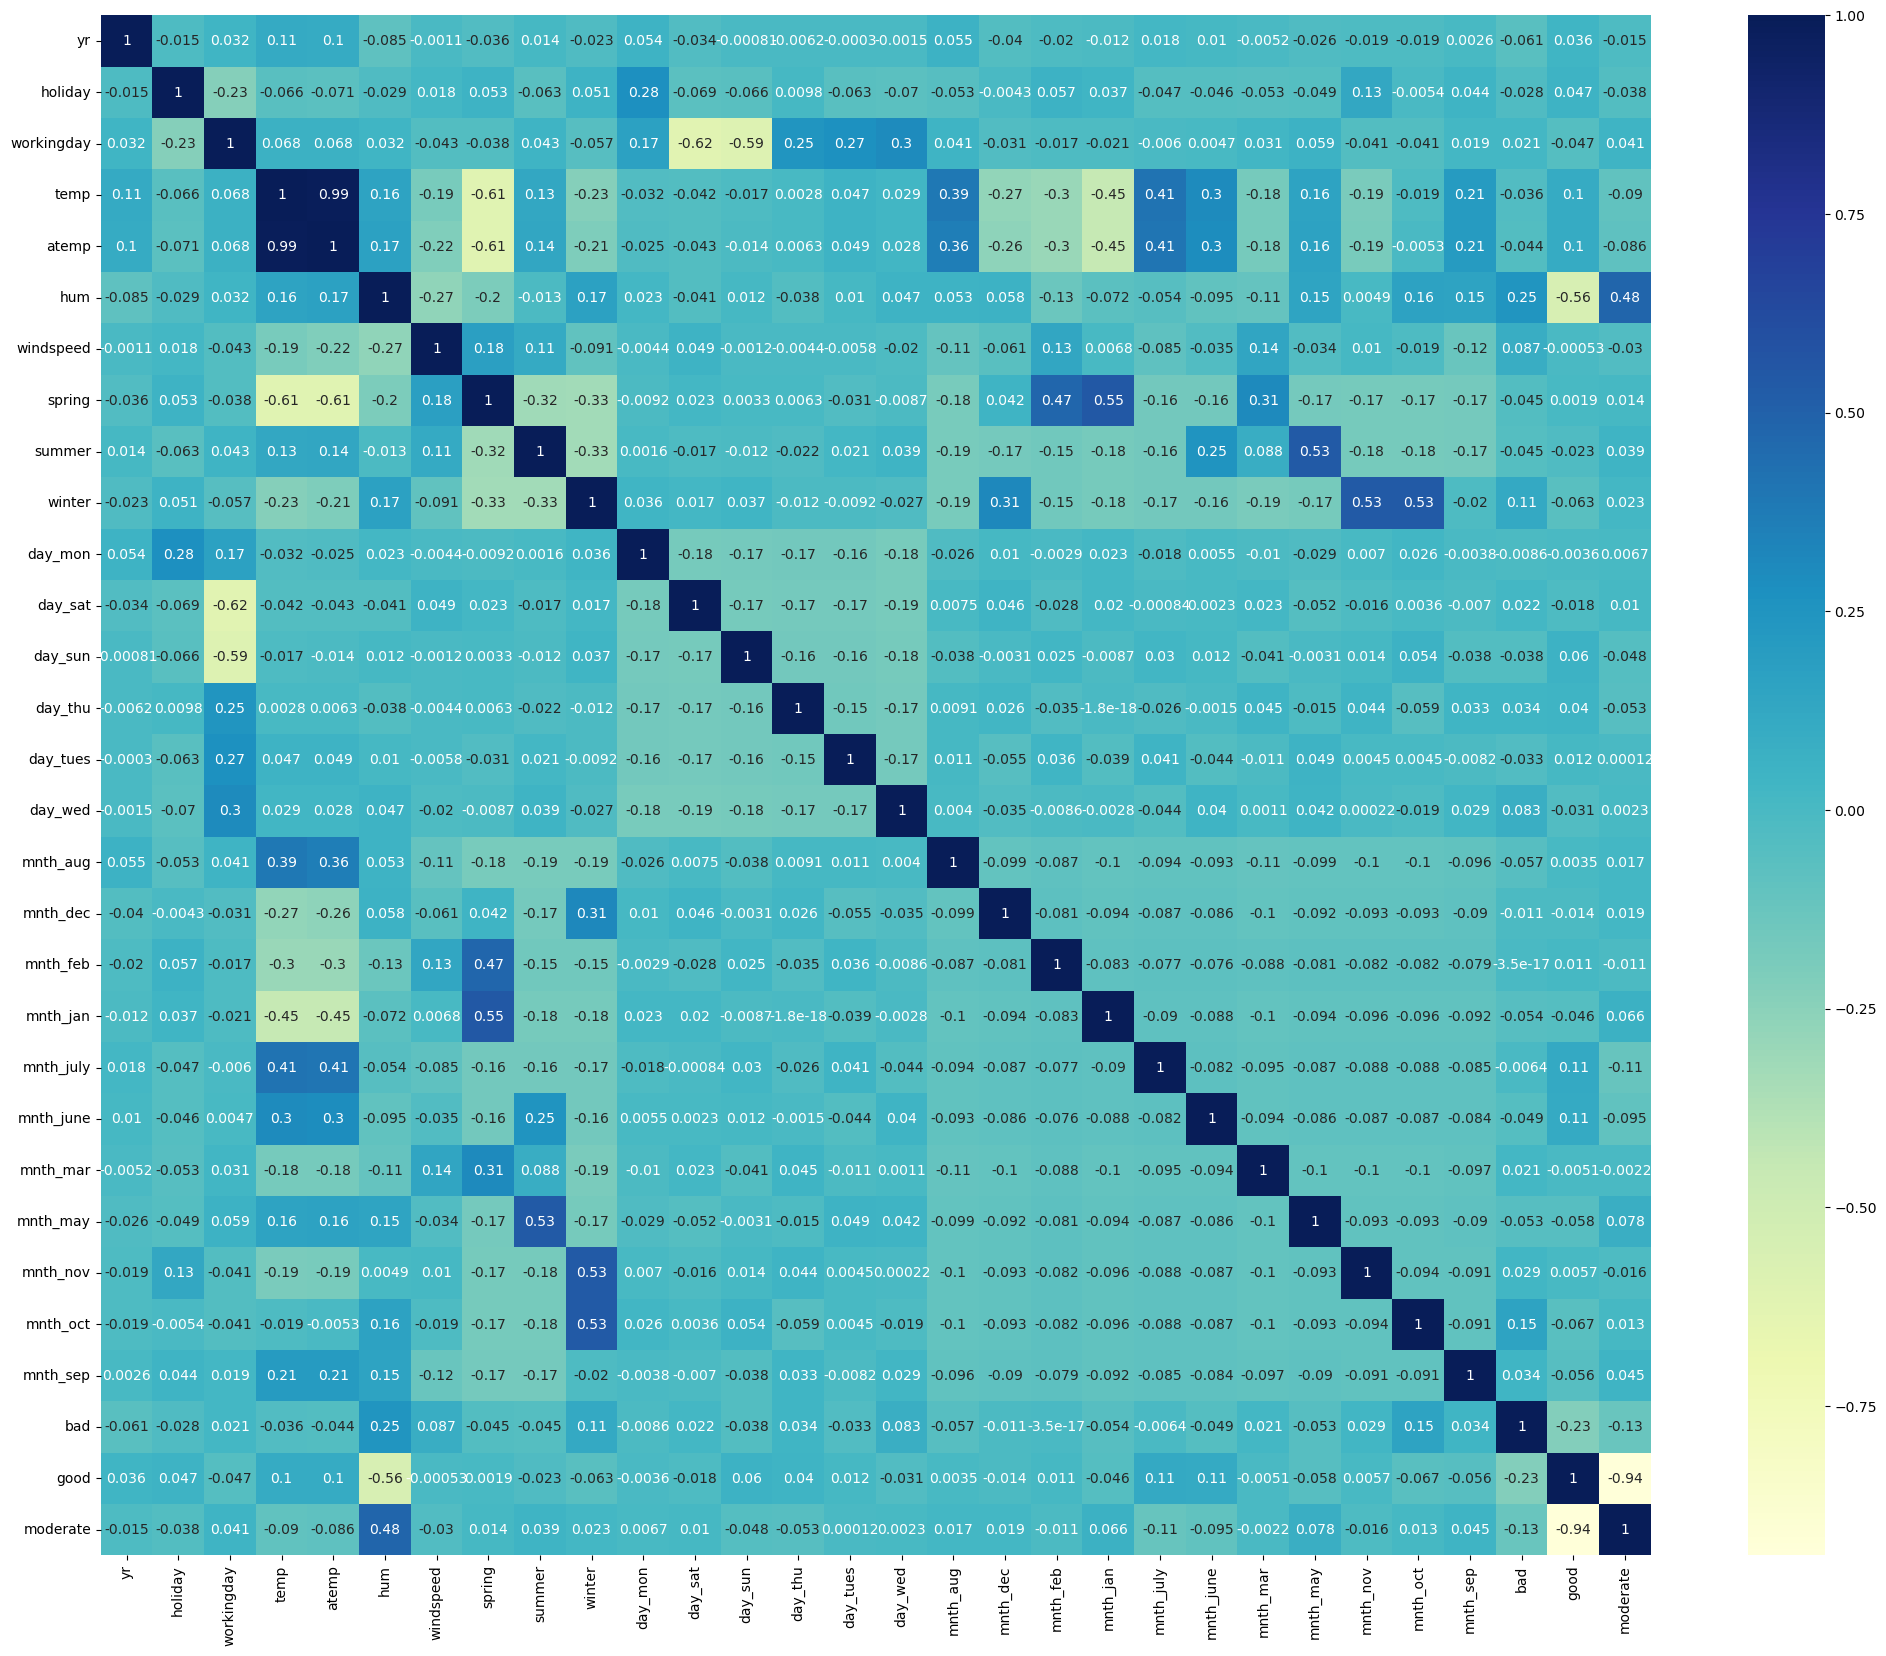

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
#conclusion: looks like many features are nicely correlated to each other and temp and atemp is highly correlated to our target variable called cnt.

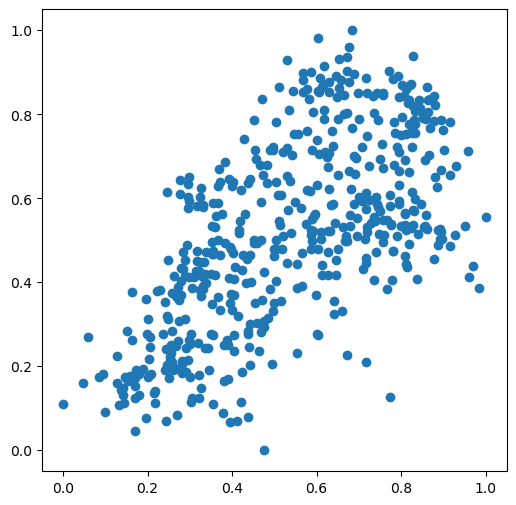

In [40]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()
#conclusion :Visualization confirms the positive correlation between temp and cnt.

### Dividing features into X and Y sets for the model building

In [41]:
# Start Building the Linear Model and removing 'cnt' from train dataset as it is a targeted variable setting it to y axis

y_train = df_train.pop('cnt')
X_train = df_train

## Step 6 : Build a Model using RFE and Automated approach

In [42]:
# using Recursive feature elimination algorithm to eliminate the less significant features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [43]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('day_mon', False, 14),
 ('day_sat', True, 1),
 ('day_sun', True, 1),
 ('day_thu', False, 13),
 ('day_tues', False, 10),
 ('day_wed', False, 11),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 9),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 4),
 ('mnth_july', True, 1),
 ('mnth_june', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 16),
 ('mnth_oct', False, 3),
 ('mnth_sep', True, 1),
 ('bad', True, 1),
 ('good', True, 1),
 ('moderate', True, 1)]

In [44]:
#selected top 15 features using RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'day_sat', 'day_sun', 'mnth_july', 'mnth_sep', 'bad', 'good',
       'moderate'],
      dtype='object')

In [45]:
#check cloumns discarted via RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'day_mon', 'day_thu', 'day_tues', 'day_wed',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct'],
      dtype='object')

In [46]:
#Create a generic method to calculate VIF's which will be needed later for builing and manipulating the data
def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Building model using statsmodel, for the detailed statistics

In [47]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tues', 'day_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sep', 'bad', 'good', 'moderate'],
      dtype='object')

## Linear Model 1

In [48]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]
#X_train_test = df_train
getVIF(X_train_rfe)

,Features,VIF
1,holiday,inf
2,workingday,inf
8,day_sat,inf
9,day_sun,inf
12,bad,inf
13,good,inf
14,moderate,inf
3,temp,2.99
6,spring,2.55
4,hum,1.89


In [49]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        15:15:48   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1255      0.023      5.527      0.0

In [50]:
# As holiday shows high p-value hence we can drop it
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
12,good,62.54
13,moderate,40.55
1,workingday,9.07
7,day_sat,6.06
8,day_sun,5.74
11,bad,5.03
2,temp,2.99
5,spring,2.55
3,hum,1.89
6,winter,1.78


In [51]:
# Building 2nd linear regression model after dropping holiday

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        15:15:49   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0971      0.033      2.971      0.0

In [52]:
# We can drop 'good' as this variable has very high VIF
X_train_new = X_train_new.drop(['good'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
3,hum,29.19
2,temp,17.24
1,workingday,16.92
7,day_sat,4.57
4,windspeed,4.52
8,day_sun,4.45
5,spring,2.79
12,moderate,2.27
6,winter,2.15
0,yr,2.08


In [53]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.81e-190
Time:                        15:15:50   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.040      5.857      0.0

In [54]:
# We can drop hum variable as it has high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,day_sat,3.76
7,day_sun,3.53
4,spring,2.44
0,yr,2.07
5,winter,1.78
11,moderate,1.57
8,mnth_july,1.37


In [55]:
getVIF(X_train_new)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,day_sat,3.76
7,day_sun,3.53
4,spring,2.44
0,yr,2.07
5,winter,1.78
11,moderate,1.57
8,mnth_july,1.37


In [56]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.38e-188
Time:                        15:15:51   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1536      0.035      4.432      0.0

In [57]:
# We can drop workingday variable as it has high VIF
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,spring,1.66
10,moderate,1.51
4,winter,1.41
7,mnth_july,1.35
5,day_sat,1.22
6,day_sun,1.20
8,mnth_sep,1.20


In [58]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          7.06e-186
Time:                        15:15:52   Log-Likelihood:                 495.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2546      0.024     10.580      0.0

In [59]:
# We can drop 'day_sat' variable as it is showing high p-value after dropping workingday
X_train_new = X_train_new.drop(['day_sat'], axis = 1)

# Run the function to calculate VIF for the new model
getVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.65
9,moderate,1.51
4,winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
5,day_sun,1.17
8,bad,1.08


In [60]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.06e-186
Time:                        15:15:52   Log-Likelihood:                 494.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2574      0.024     10.731      0.0

In [61]:
##Now VIF and p-values both looks stable and acceptable for all the variables so considering this as a final model.

In [62]:
lr_6.params

const        0.257404
yr           0.234427
temp         0.450943
windspeed   -0.141350
spring      -0.113257
winter       0.046138
day_sun     -0.044457
mnth_july   -0.069564
mnth_sep     0.052556
bad         -0.286776
moderate    -0.081107
dtype: float64

## Step 7: Residual Analysis of the train data and validation

In [63]:
X_train_lm_6

,const,yr,temp,windspeed,spring,winter,day_sun,mnth_july,mnth_sep,bad,moderate
653,1.0,1,0.509887,0.300794,0,1,0,0,0,0,0
576,1.0,1,0.815169,0.264686,0,0,0,1,0,0,0
426,1.0,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1.0,1,0.245101,0.663106,1,0,1,0,0,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0,0,0,0,1
578,1.0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,1,0,0,0,0,1


In [64]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

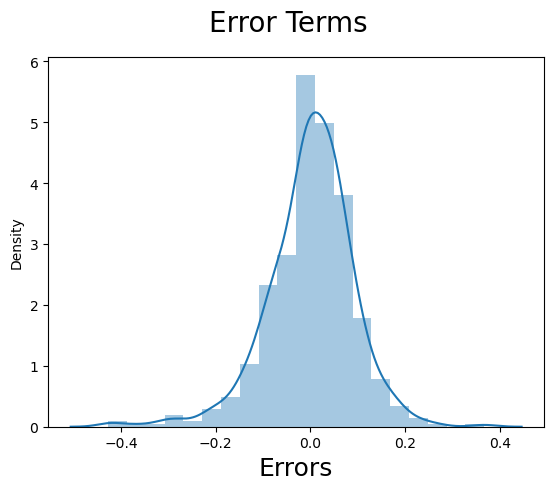

In [65]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Errors are normally distribured here with mean 0. So everything seems to be fine

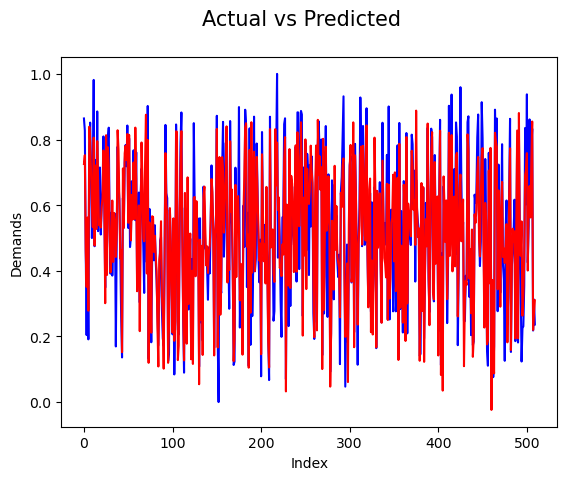

In [66]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_lm_6),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems ok

In [186]:
getVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.65
9,moderate,1.51
4,winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
5,day_sun,1.17
8,bad,1.08


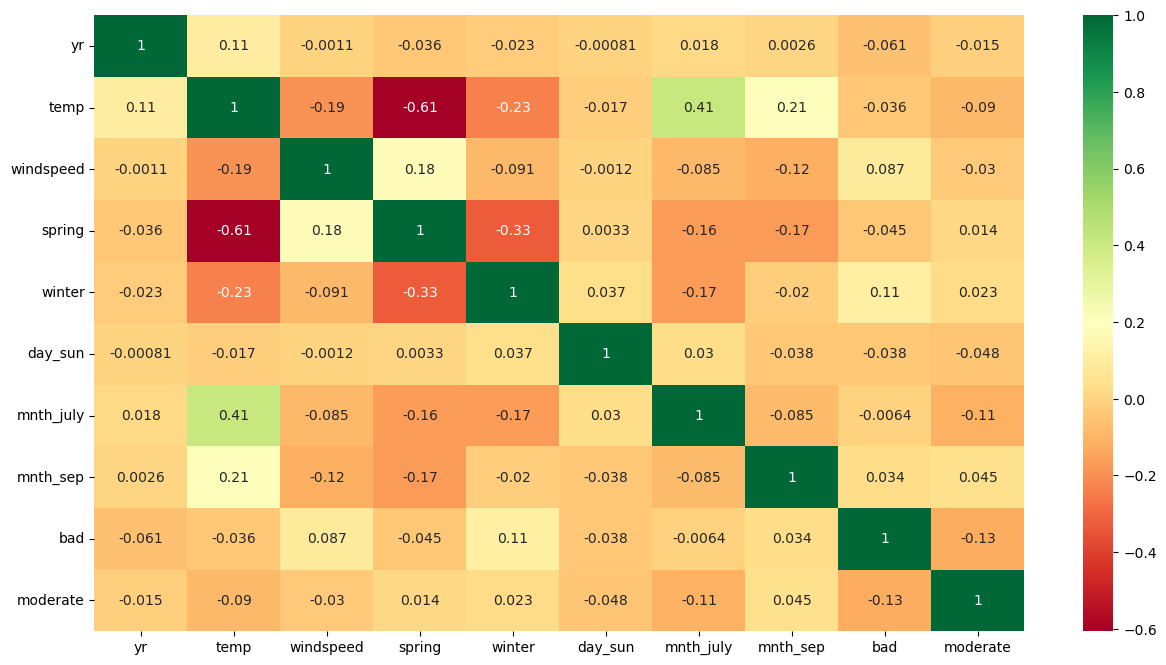

In [187]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Step 8: Making Predictions Using the Final Model

In [188]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,1,0,0,0,0,0,0,1,0


In [189]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,bad,good,moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
y_test = df_test.pop('cnt')
X_test = df_test

In [191]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

In [192]:
y_pred = lr_6.predict(X_test_lm6)

In [193]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8087

## Step 9: Model Evaluation - Homoscedacity

Text(0, 0.5, 'y_pred')

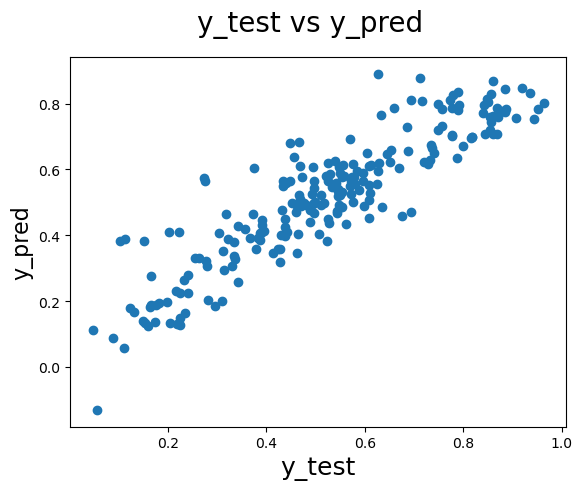

In [194]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [195]:
round(lr_6.params,4)

const        0.2574
yr           0.2344
temp         0.4509
windspeed   -0.1414
spring      -0.1133
winter       0.0461
day_sun     -0.0445
mnth_july   -0.0696
mnth_sep     0.0526
bad         -0.2868
moderate    -0.0811
dtype: float64

In [ ]:
#We can see that the equation of our best fitted line is:

0.2574 + 0.2344 * yr + 0.4509 * temp - 0.1414 * windspeed - 0.1133 * spring + 0.0461 * winter - 0.0445 * day_sun - 0.0696 * mnth_july + 0.0526 * mnth_sep - 0.2868 * bad - 0.0811 * moderate

In [196]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7995


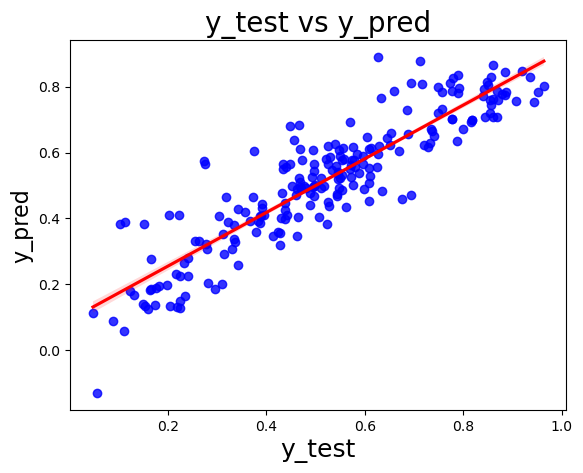

In [197]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.808
- Train dataset Adjusted R^2 : 0.830  
- Test dataset Adjusted R^2  : 0.799

Demand of bikes depend on year, temp, windspeed, spring, winter, day_sun, day_sat, july, sep, bad and moderate.

Interepretation of results
Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
Due to winter and bad weather there would be less bookings.
Due to weekends there will be less bookings.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.
Conclusion
Significant variables to predict the demand for shared bikes

temp
windspeed
Season (spring and winter )
months(July, September)
Year (2019)
Sunday,saturday
weathersit( Light Snow, Mist + Cloudy)